#      Cat Door AI Project
<img style="width:45%" src="https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"/>



# Executive Summary

Project Goal: Develop an AI system to recognize specific cat faces and control access through a cat door, ensuring only the owner's cat can enter.

Stakeholders:

Developer: Oleksandr Fomin

Stakeholder: Oleksiy Fomin

Data Collection:

Primary Dataset: 106 images of the owner's cat.
Secondary Dataset: 131 images of other cats and animals (e.g., hedgehogs, dogs, and foxes) sourced from public datasets.

Methodology:

Initial Model: Custom Convolutional Neural Network (CNN) built using TensorFlow’s Keras API.

Data Augmentation: Techniques include rotation, scaling, and color adjustment to improve model robustness.

Key Insights:

Model Performance: Evaluated using accuracy, precision, and recall.


Challenges:

Data Limitations: Need for a sufficient number of images to train the model effectively.

Accuracy Requirements: High accuracy is crucial to prevent the owner's cat from being locked out.



## 🔎Data Analysis
I have a primary dataset of my cat ("MYCAT") which consists of 106 images. Additionally, I have access to a larger dataset consisting of 131 images of other cats, hedgehogs, dogs, and foxes, sourced from various public datasets and contributions. The objective is to use these images not only to train a robust model but also to ensure that it can generalize well across different types of inputs and environmental conditions.


In [47]:
import os
from datetime import datetime
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

def extract_image_properties(image_path, dataset_label):
    with Image.open(image_path) as img:
        width, height = img.size
        color_depth = img.mode
        format = img.format
    
    date_modified = datetime.fromtimestamp(os.path.getmtime(image_path))

    return {
        'image_path': image_path,
        'width': width,
        'height': height,
        'color_depth': color_depth,
        'format': format,
        'date_modified': date_modified,  
        'dataset': dataset_label 
    }

def process_images_in_directory(directory_path, dataset_label):
    image_properties_list = []

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            properties = extract_image_properties(file_path, dataset_label)
            image_properties_list.append(properties)

    return pd.DataFrame(image_properties_list)

directory_path = 'c:\\Fontys s4\\CatDoor\\All_Cats\\MYCAT'

df_images_mycat = process_images_in_directory(directory_path, 'MyCat')
print(df_images_mycat.head(100))
print(df_images_mycat.dtypes)
print(df_images_mycat.describe())


                                           image_path  width  height  \
0   c:\Fontys s4\CatDoor\All_Cats\MYCAT\0-02-05-08...    901    1600   
1   c:\Fontys s4\CatDoor\All_Cats\MYCAT\0-02-05-08...    901    1600   
2   c:\Fontys s4\CatDoor\All_Cats\MYCAT\0-02-05-09...    901    1600   
3   c:\Fontys s4\CatDoor\All_Cats\MYCAT\0-02-05-22...    901    1600   
4   c:\Fontys s4\CatDoor\All_Cats\MYCAT\0-02-05-27...    901    1600   
..                                                ...    ...     ...   
95  c:\Fontys s4\CatDoor\All_Cats\MYCAT\photo_53_2...   1280     721   
96  c:\Fontys s4\CatDoor\All_Cats\MYCAT\photo_54_2...   1280     721   
97  c:\Fontys s4\CatDoor\All_Cats\MYCAT\photo_55_2...   1280     721   
98  c:\Fontys s4\CatDoor\All_Cats\MYCAT\photo_56_2...   1280     721   
99  c:\Fontys s4\CatDoor\All_Cats\MYCAT\photo_57_2...   1280     721   

   color_depth format              date_modified dataset  
0          RGB   JPEG 2024-03-26 21:22:44.374942   MyCat  
1          RGB   

I've listed the properties of images from the "MyCat" dataset, showing the image path, width, height, color depth, date and format. 

In [3]:
from PIL import Image
import os
import pandas as pd

def extract_image_properties(image_path, dataset_label):
    with Image.open(image_path) as img:
        width, height = img.size
        color_depth = img.mode
        format = img.format
    
    return {
        'image_path': image_path,
        'width': width,
        'height': height,
        'color_depth': color_depth,
        'format': format,
        'dataset': dataset_label 
    }

def process_images_in_directory(directory_path, dataset_label):
    image_properties_list = []

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            properties = extract_image_properties(file_path, dataset_label)
            image_properties_list.append(properties)

    return pd.DataFrame(image_properties_list)

directory_path = 'c:\\Fontys s4\\CatDoor\\All_Cats\\AllCats'

df_images_allcats = process_images_in_directory(directory_path, 'AllCats')
print(df_images_allcats.head())
print(df_images_allcats.dtypes)
print(df_images_allcats.describe())


                                          image_path  width  height  \
0  c:\Fontys s4\CatDoor\All_Cats\AllCats\00001280...    375     500   
1  c:\Fontys s4\CatDoor\All_Cats\AllCats\00001280...    650    1024   
2  c:\Fontys s4\CatDoor\All_Cats\AllCats\00001280...    500     284   
3  c:\Fontys s4\CatDoor\All_Cats\AllCats\00001281...    346     500   
4  c:\Fontys s4\CatDoor\All_Cats\AllCats\00001281...    500     334   

  color_depth format  dataset  
0         RGB   JPEG  AllCats  
1         RGB   JPEG  AllCats  
2         RGB   JPEG  AllCats  
3         RGB   JPEG  AllCats  
4         RGB   JPEG  AllCats  
image_path     object
width           int64
height          int64
color_depth    object
format         object
dataset        object
dtype: object
             width       height
count   131.000000   131.000000
mean    623.152672   480.167939
std     617.551137   547.118988
min     165.000000   150.000000
25%     313.000000   190.500000
50%     500.000000   375.000000
75%     626

ISimilarly, the "AllCats" dataset, while more varied in image dimensions and conditions, has been standardized for training purposes. This involves resizing and enhancing images to match the requirements of my CNN model.

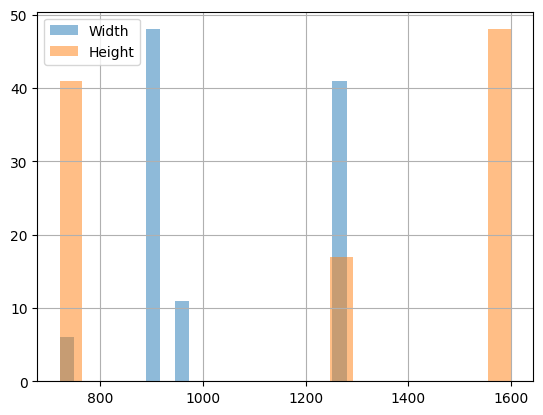

In [4]:
df_images_mycat['width'].hist(bins=20, alpha=0.5, label='Width')
df_images_mycat['height'].hist(bins=20, alpha=0.5, label='Height')
plt.legend()
plt.show()


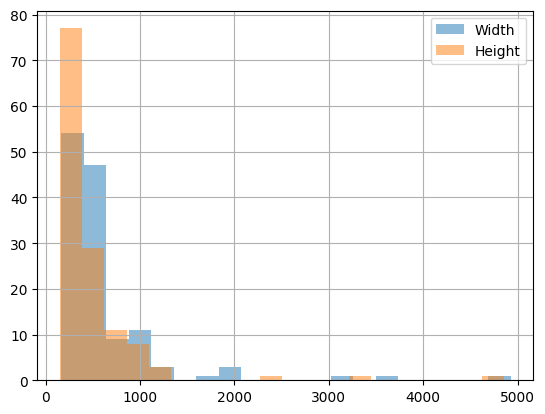

In [5]:
df_images_allcats['width'].hist(bins=20, alpha=0.5, label='Width')
df_images_allcats['height'].hist(bins=20, alpha=0.5, label='Height')
plt.legend()
plt.show()

To accommodate the variability in image dimensions and ensure consistent input sizes for our CNN model, all images will be resized to a standard dimension of 150x150 pixels. This is complemented by data augmentation techniques such as rotation, width and height shifting, shear adjustments, zooming, and horizontal flipping to improve the robustness of the model against overfitting and enhance its ability to generalize to new, unseen images.

In [74]:
print(df_images_mycat['format'].value_counts())
print(df_images_mycat['color_depth'].value_counts())


format
JPEG    106
Name: count, dtype: int64
color_depth
RGB    106
Name: count, dtype: int64


In [75]:
print(df_images_allcats['format'].value_counts())
print(df_images_allcats['color_depth'].value_counts())

format
JPEG    123
WEBP      8
Name: count, dtype: int64
color_depth
RGB    131
Name: count, dtype: int64


all images are JPEGs with RGB so it's convenient for preprocessing since I don't need to convert from various formats or color depths

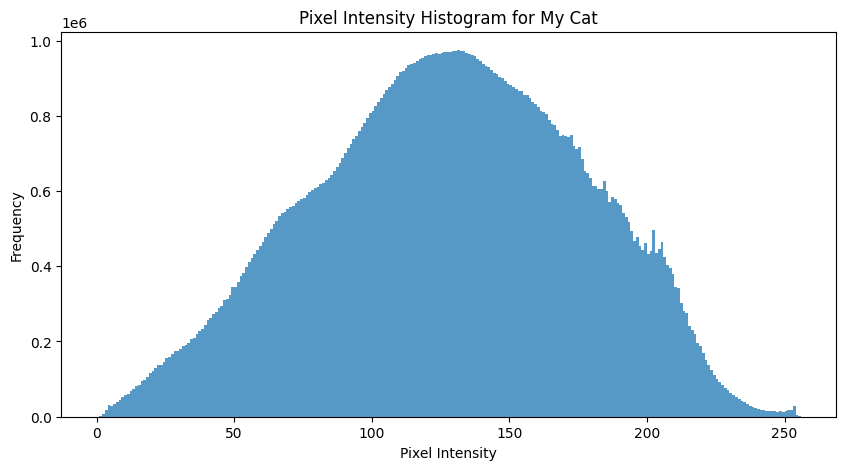

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_combined_intensity_histogram(directory_path):
    all_intensities = []
    
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            img = Image.open(file_path).convert('L')
            img_array = np.array(img).flatten()
            all_intensities.extend(img_array)
            
    plt.figure(figsize=(10, 5))
    plt.hist(all_intensities, bins=256, range=(0, 256), alpha=0.75)
    plt.title('Pixel Intensity Histogram for My Cat')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

directory_path = 'c:\\Fontys s4\\CatDoor\\All_Cats\\MYCAT'
plot_combined_intensity_histogram(directory_path)

The distribution has a peak around the mid intensity values. This means that most pixels in the images of MYCAT are neither very dark nor very bright but are rather in the middle range of intensities.

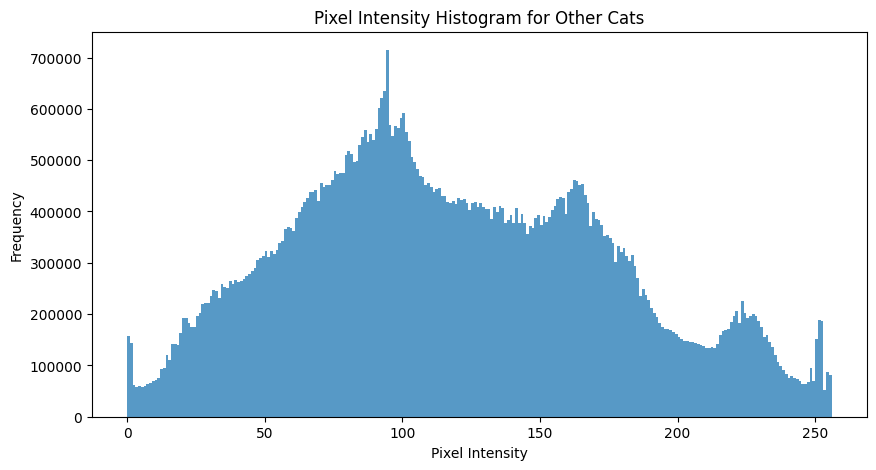

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_combined_intensity_histogram(directory_path):
    all_intensities = []
    
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            img = Image.open(file_path).convert('L')
            img_array = np.array(img).flatten()
            all_intensities.extend(img_array)
            
    plt.figure(figsize=(10, 5))
    plt.hist(all_intensities, bins=256, range=(0, 256), alpha=0.75)
    plt.title('Pixel Intensity Histogram for Other Cats')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

directory_path = 'c:\\Fontys s4\\CatDoor\\All_Cats\\AllCats'
plot_combined_intensity_histogram(directory_path)



This histogram shows a distribution with two peaks in the center. I managed my dataset for other animals so the histograms are as similar as possible. Otherwise, since most of pictures in MYCAT dataset have a green grass background the model would recognise the background but not the cat. So, I added a lot of photos of other animals with green grass background to normalize the pixel intensity between two datasets.

## Conclusion

The dataset is structured into the owner's cat and other animals, ensuring labeling.
The datasets include diverse representations of cats in varied conditions, enhancing the model's ability to generalize to different breeds, sizes, and environments.

Image preprocessing and augmentation techniques will be use to standardize input sizes and enhance the dataset. By resizing, flipping, and rotating images, the model will be trained to recognize different features despite varying conditions.

The careful attention to background consistency (green grass) and matching pixel intensity across both datasets helps minimize model confusion, ensuring accurate differentiation between the owner's cat and other animals.





# Model Definition

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())


c:\Users\Justs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In this code I define a CNN model for binary classification of images. I use TensorFlow and Keras. Also I use dropout layer here to prevent overfitting. I tried to use pre-trained models, but for some reason all of them showed bad results so I decided to try training my own model from scratch.

# Preprocessing

In [39]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

my_cat_dir = os.path.join('c:\Fontys s4\CatDoor\All_Cats\MYCAT')
other_cats_dir = os.path.join('c:\Fontys s4\CatDoor\All_Cats\AllCats')

target_size = (150, 150)

def load_images_from_directory(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return np.array(images), np.array(labels)

my_cat_images, my_cat_labels = load_images_from_directory(my_cat_dir, 1)  
other_cat_images, other_cat_labels = load_images_from_directory(other_cats_dir, 0)  

images = np.concatenate((my_cat_images, other_cat_images))
labels = np.concatenate((my_cat_labels, other_cat_labels))


I am loading and preparing images of my cat and other cats from directories. Then I set a target size for each image, load the images from two directories, convert them to arrays, and assign labels (1 for my cat, 0 for other cats). Finally, I combine both sets of images and labels into larger arrays.

# Splitting into train/validate/test

In [40]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42) 



Here, I am splitting my dataset of cat images into three sets: training, validation, and test. The dataset is split ensuring a balanced representation of various cat breeds, sizes, and environmental conditions, maintaining ethical standards with regard to data usage and diversity. 20% of the images are reserved as a test set to evaluate the model's performance on unseen data, while the remaining data is split with 25% for validation and the rest for training.


# Modeling

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=1)
results = []
fold_no = 1

for train_index, val_index in kf.split(train_images):
    kf_train_images, kf_val_images = train_images[train_index], train_images[val_index]
    kf_train_labels, kf_val_labels = train_labels[train_index], train_labels[val_index]
    
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    val_datagen = ImageDataGenerator(rescale=1./255)
    
    kf_train_generator = train_datagen.flow(kf_train_images, kf_train_labels, batch_size=32)
    kf_val_generator = val_datagen.flow(kf_val_images, kf_val_labels, batch_size=32)
    
    model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(
        kf_train_generator,
        steps_per_epoch=len(kf_train_generator),
        validation_data=kf_val_generator,
        validation_steps=len(kf_val_generator),
        epochs=15
    )
    
    results.append(history.history)
    print(f"Fold {fold_no} completed.")

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=32)

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")



Epoch 1/15


c:\Users\Justs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.5490 - loss: 0.7768 - val_accuracy: 0.3793 - val_loss: 1.5231
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/15


c:\Users\Justs\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 0.6705 - loss: 0.7541 - val_accuracy: 0.7931 - val_loss: 0.3189
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.7499 - loss: 0.4269 - val_accuracy: 0.8621 - val_loss: 0.2999
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step - accuracy: 0.8850 - loss: 0.3038 - val_accuracy: 0.8966 - val_loss: 0.1617
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.8737 - loss: 0.3114 - val_accuracy: 0.9310 - val_loss: 0.1454
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e

Here I created an ImageDataGenerator to train the data with data augmentation, I used rotation, shift, shear, zoom and horizontal flip to make more samples of my cat's images. Then I train the model using the train_generator with augmented images, validating its performance with the val_generator. Also, I do use cross validation with 5 folders to increase accuracy of the model.

# Evaluation

In [42]:

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

model.save('cat_face_recognition_model.h5')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8889 - loss: 0.2330 


Test accuracy: 0.8958333134651184, Test loss: 0.21360382437705994


Here I validate my model and accuracy looks well. Also in the next step I visualize the results of predictions where when number is lower than 0.5 it means model predicted that it is not my cat and when number is higher than 0.5 it predicted as my cat. Results seem pretty satisfying. I tried training the model in different ways: Using 8k images of random cat, 5k, 1k where I only augmented images of my own cat dataset but it didn't show any good results. Then I decided to try combining images of my cat and images of random cat, augment them together and then train and it worked much better.

In [43]:
import numpy as np
from sklearn.metrics import precision_score, recall_score


test_images, test_labels = next(test_generator)

predictions = model.predict(test_images)
predicted_classes = (predictions >= 0.5).astype(int) 

precision = precision_score(test_labels, predicted_classes, average='macro', zero_division=1)
recall = recall_score(test_labels, predicted_classes, average='macro', zero_division=1)

print(f"Precision: {precision}, Recall: {recall}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Precision: 0.9285714285714286, Recall: 0.95


Here i am counting precision and a recall

My model correctly predicts the positive class 92.8% of the time when it predicts that class. This high precision indicates that the model is very effective at minimizing false positives, so when it predicts a positive result, it is likely correct.

More importantly, given that false negatives are the worst for my use case because leaving owner's cat outside is the worst scenario, the recall of 0.95 is crucial. The model successfully identifies 95% of all actual positives, missing only 5% which is good.

Here I'm gonna visualize the predictions. After all predictions there will be predictions with negative result.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


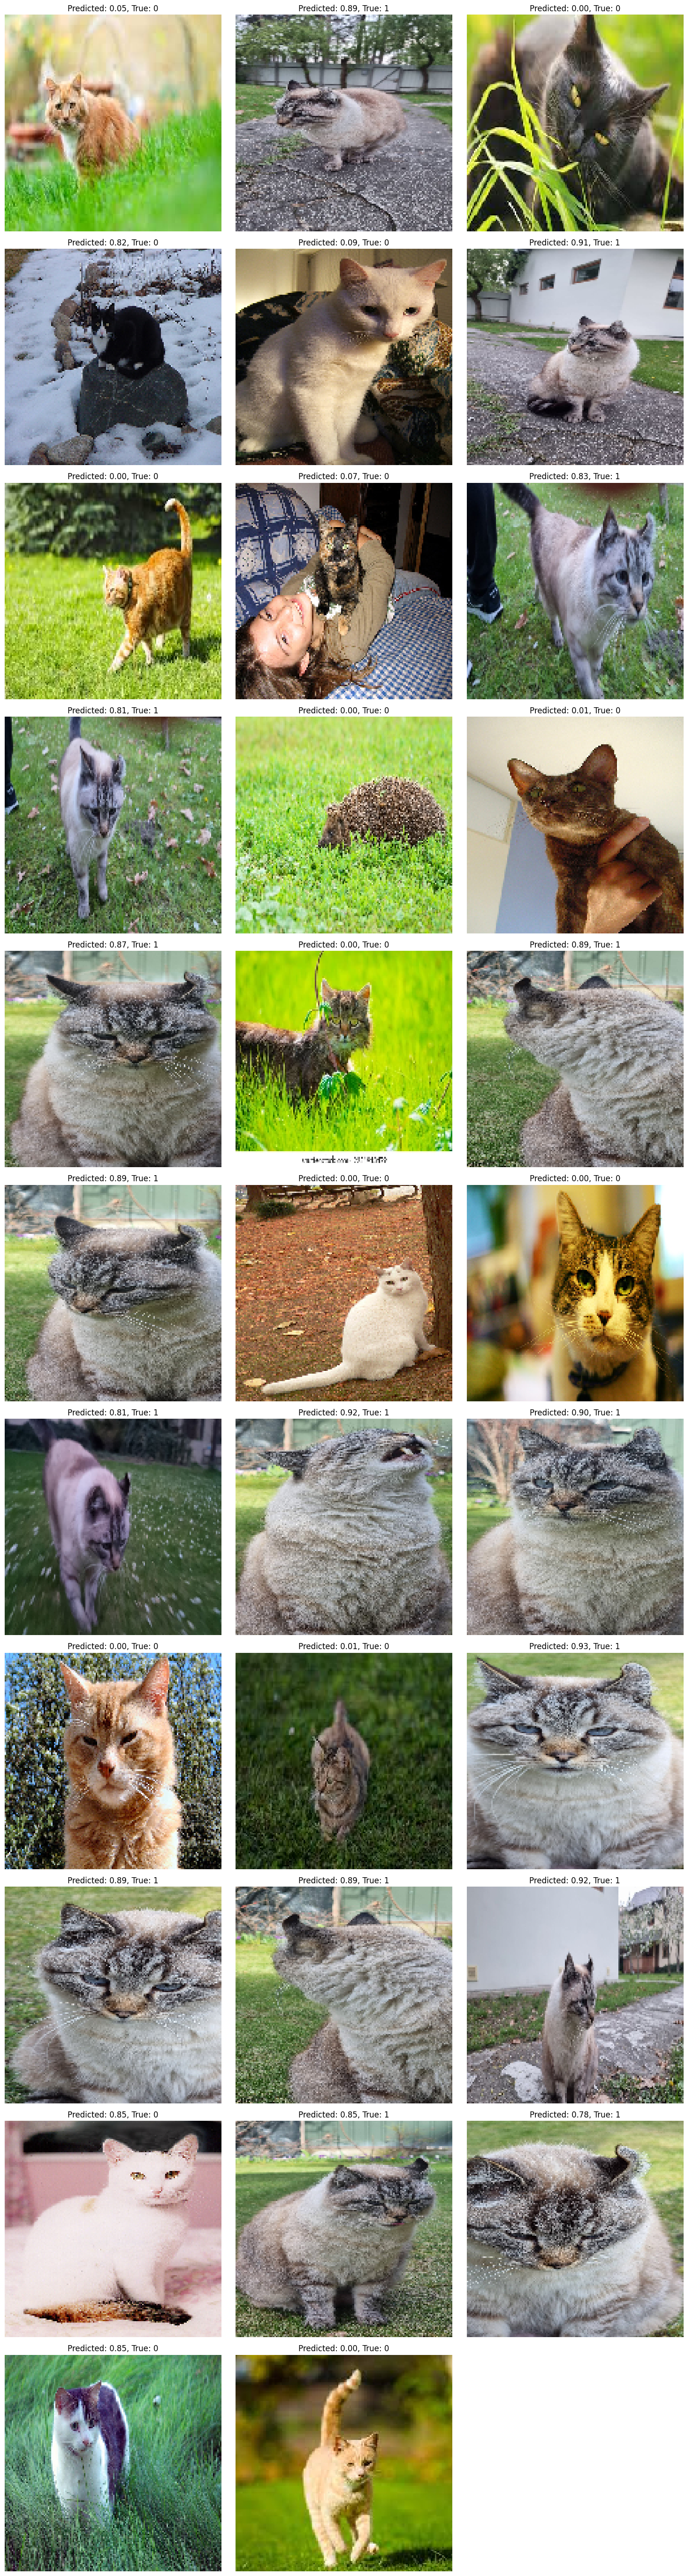

In [48]:
import matplotlib.pyplot as plt

test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

num_columns = 3
num_rows = len(test_images) // num_columns + (len(test_images) % num_columns > 0)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.ravel()

for i, (image, label) in enumerate(zip(test_images, test_labels)):
    ax = axes[i]
    ax.imshow(image.squeeze(), cmap='gray')  
    ax.set_title(f"Predicted: {predictions[i][0]:.2f}, True: {label}")
    ax.axis('off')

for ax in axes[i+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


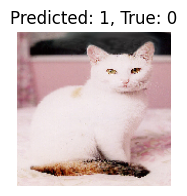

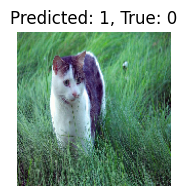

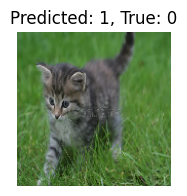

In [45]:
import matplotlib.pyplot as plt
import numpy as np


for i, (image, label) in enumerate(zip(test_images, test_labels)):
    predicted_label = np.round(predictions[i]).astype(int)
    if predicted_label != label:
        plt.figure(figsize=(2, 2))
        plt.imshow(image)
        plt.title(f"Predicted: {predicted_label[0]}, True: {label}")
        plt.axis('off')
        plt.show()

Here I am visualizing images that were missclassified. Before I had a trouble that only my cat was missclassified as not my cat, but seems like it was a coincidence, because after re-splitting and re-training the model the results seem absolutly normal and reasonable.

### Model Evaluation Summary

I believe the Cat Door AI Project is on track to build a smart system that lets only the owner's cat in and keeps other animals out. However, there are still some things that can be made better:
Recall: The system sometimes doesn't recognize the owner's cat correctly, meaning it might get stuck outside which is the worst scenario. To fix this, the model should be trained with more pictures showing different cat angles, lighting, and facial expressions. But at this point I believe recall is high enough.

But in general I believe that it is a sufficient work which is actually proven step by step in this notebook. The accuracy, precision and recall, these are pretty high at this point, but still I think I can make the model more robust.
